# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import math
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Uploading Datasets

In [5]:
paths  = glob.glob(os.path.join("C:/Users/Farooq Arshad/Desktop/Thesis wells/C_sand data","*.csv"))

In [6]:
data=[0]*4
for i in range(len(paths)):
    data[i] = pd.read_csv(paths[i])
    del data[i][data[i].columns[0]]

In [7]:
paths

['C:/Users/Farooq Arshad/Desktop/Thesis wells/C_sand data\\C_sand sawan well 1.csv',
 'C:/Users/Farooq Arshad/Desktop/Thesis wells/C_sand data\\C_sand sawan well 2.csv',
 'C:/Users/Farooq Arshad/Desktop/Thesis wells/C_sand data\\C_sand sawan well 7.csv',
 'C:/Users/Farooq Arshad/Desktop/Thesis wells/C_sand data\\C_sand sawan well 8.csv']

# Creating list of effective porosity of each well

In [8]:
effect=[0]*4
for i in range(len(data)):
    effect[i] = round(data[i]["Effective Porosity"].mean(),3)
    

In [9]:
effective_porosity = [0]*4

In [10]:
effective_porosity[0]= effect[0]
effective_porosity[1]= effect[2]
effective_porosity[2]= effect[3]
effective_porosity[3]= effect[1]

In [11]:
effective_porosity

[14.239, 13.39, 13.608, 12.896]

# # Showing coordinates and effective porosity of each well.

In [164]:
y_coordinate = [026.991828 ,026.999283 ,027.009156 ,027.022972 ]
x_coordinate = [068.906992 ,068.923317 ,068.933394 ,068.933806 ]
wells_n = ["SAWAN-01", "SAWAN-07", 'SAWAN-08', 'SAWAN-02']

In [165]:
paths = glob.glob(os.path.join("C:/Users/Farooq Arshad/Desktop/Thesis wells/C_sand data","*.csv"))

In [166]:
maps = pd.DataFrame({"y_coordinate":y_coordinate,"x_coordinate":x_coordinate,"effective porosity":effective_porosity},index=wells_n)

In [167]:
maps

,y_coordinate,x_coordinate,effective porosity
SAWAN-01,26.991828,68.906992,14.239
SAWAN-07,26.999283,68.923317,13.390
SAWAN-08,27.009156,68.933394,13.608
SAWAN-02,27.022972,68.933806,12.896


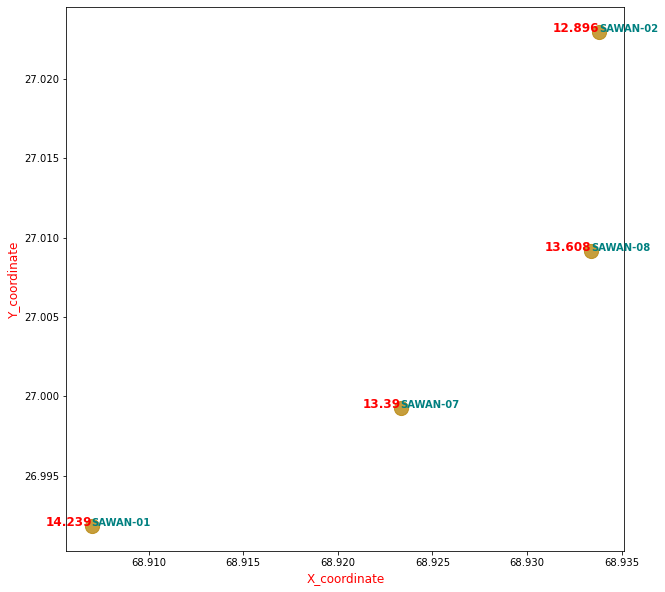

In [168]:
plt.figure(figsize=(10,10))
sns.regplot(data=maps, x="x_coordinate", y="y_coordinate", fit_reg=False, color="darkgoldenrod", scatter_kws={'s':200})
plt.xlabel("X_coordinate",color="red",fontsize=12)
plt.ylabel("Y_coordinate",color="red",fontsize=12)
for i in maps.index:
     plt.text(maps.loc[i][1], maps.loc[i][0], i, horizontalalignment='left', size='medium', color='teal', weight='semibold')
for j in range(len(maps.index)):
     plt.text(maps.iloc[j][1], maps.iloc[j][0], maps["effective porosity"][j], horizontalalignment='right', size='large', color='red', weight='semibold')
plt.show()

In [169]:
distances = maps.copy()

In [170]:
distances

,y_coordinate,x_coordinate,effective porosity
SAWAN-01,26.991828,68.906992,14.239
SAWAN-07,26.999283,68.923317,13.390
SAWAN-08,27.009156,68.933394,13.608
SAWAN-02,27.022972,68.933806,12.896


In [177]:
a = len(distances)
((a)*(a-1))/(np.math.factorial(2))

6.0

In [178]:
distances.iloc[2][2]

13.608

In [179]:
distance=[]
well_vari=[]

In [183]:
for i in range(a):
    for j in range(a):
        if distances.iloc[i].name == distances.iloc[j].name:
            pass
        else:
            y=(distances.iloc[i][0]-distances.iloc[j][0])**2
            x=(distances.iloc[i][1]-distances.iloc[j][1])**2
            dist = math.sqrt(x + y)
            well_vari.append(str(i)+str(j))
            distance.append(dist)
wells_info = pd.DataFrame({"wells_name":well_vari,"wells_distance":distance}) 
a = wells_info[["wells_distance"]].drop_duplicates() 

In [189]:
wells_info.loc[a.index]

,wells_name,wells_distance
0,01,0.017947
1,02,0.031580
2,03,0.041097
4,12,0.014108
5,13,0.025907
8,23,0.013822


In [185]:
wells_info = wells_info.iloc[a.index]


In [190]:
distance = wells_info[["wells_distance"]]

In [191]:
minim = distance.min()[0]
maxim = distance.max()[0]

In [193]:
minim

0.013822141657498527

In [192]:
_range = maxim-minim
_range

0.027274565412532533

In [42]:
bins = int(input("Number of bins : "))

Number of bins : 5


In [195]:
r = _range/(bins-1)

In [196]:
r

0.006818641353133133

In [197]:
r_val = np.arange(minim,maxim,r)

In [198]:
r_val = np.append(r_val,maxim)

In [199]:
list_ranges=pd.DataFrame({"Bins":np.arange(1,bins+1),"r":r_val},index=np.arange(0,bins))

In [200]:
list_ranges

,Bins,r
0,1,0.013822
1,2,0.020641
2,3,0.027459
3,4,0.034278
4,5,0.041097


In [201]:
list_ranges["delta_r"] = r

In [202]:
list_ranges

,Bins,r,delta_r
0,1,0.013822,0.006819
1,2,0.020641,0.006819
2,3,0.027459,0.006819
3,4,0.034278,0.006819
4,5,0.041097,0.006819


In [203]:
list_ranges["negative delta r"]=list_ranges["r"]-(list_ranges["delta_r"]/2)

In [204]:
list_ranges["positive delta r"]=list_ranges["r"]+(list_ranges["delta_r"]/2)

In [205]:
list_ranges

,Bins,r,delta_r,negative delta r,positive delta r
0,1,0.013822,0.006819,0.010413,0.017231
1,2,0.020641,0.006819,0.017231,0.024050
2,3,0.027459,0.006819,0.024050,0.030869
3,4,0.034278,0.006819,0.030869,0.037687
4,5,0.041097,0.006819,0.037687,0.044506


In [206]:
list_ranges["# wells"]=0
list_ranges["name of wells"]= ""

In [207]:

for i in range(len(wells_info)):
    for j in range(len(list_ranges)):
        if (wells_info[["wells_distance"]].iloc[i][0]>list_ranges[["negative delta r"]].iloc[j][0])& (wells_info[["wells_distance"]].iloc[i][0]<list_ranges[["positive delta r"]].iloc[j][0]):
            list_ranges["# wells"].iloc[j]=list_ranges["# wells"].iloc[j]+1
            list_ranges["name of wells"].iloc[j]=  wells_info["wells_name"].iloc[i]+"."+ list_ranges["name of wells"].iloc[j]
        
        

E:\anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [208]:
list_ranges

,Bins,r,delta_r,negative delta r,positive delta r,# wells,name of wells
0,1,0.013822,0.006819,0.010413,0.017231,2,23.12.
1,2,0.020641,0.006819,0.017231,0.024050,1,01.
2,3,0.027459,0.006819,0.024050,0.030869,1,13.
3,4,0.034278,0.006819,0.030869,0.037687,1,02.
4,5,0.041097,0.006819,0.037687,0.044506,1,03.


In [209]:
# 0 means sawan well 1 
# 1  means sawan well 7
# 2 means sawan well 8
# 3 means sawan well 2

In [210]:
# for i in range(len(list_ranges)):
#     print(f"Bins no {i}")
#     no_of_wells = list_ranges.loc[i][6]
#     a = len(list_ranges.loc[i][6])-list_ranges.loc[i][5]
#     print(a)
#     for i in range(a):
#         wells_no=[0]*(a)
#         print("Type the name of wells you want to calculate the change in effective porosity :")
#         wells_no[i] = input("Enter the well number")
#         effective_porosity[wells_no[i]]
    
        

In [211]:
variance=[]

In [212]:
a=(effective_porosity[0]-effective_porosity[1])**2
b=(effective_porosity[1]-effective_porosity[2])**2

In [213]:
c = math.sqrt((a+b)/2)
variance.append(c)

In [214]:
d=math.sqrt((effective_porosity[0]-effective_porosity[1])**2)
variance.append(d)

In [215]:
e=math.sqrt((effective_porosity[1]-effective_porosity[3])**2)
variance.append(e)

In [216]:
f=math.sqrt((effective_porosity[0]-effective_porosity[2])**2)
variance.append(f)

In [217]:
g=math.sqrt((effective_porosity[0]-effective_porosity[3])**2)
variance.append(g)

In [218]:
variance

[0.6198084381484332,
 0.8490000000000002,
 0.4939999999999998,
 0.6310000000000002,
 1.343]

In [219]:
list_ranges["variances"]=variance

In [220]:
list_ranges

,Bins,r,delta_r,negative delta r,positive delta r,# wells,name of wells,variances
0,1,0.013822,0.006819,0.010413,0.017231,2,23.12.,0.619808
1,2,0.020641,0.006819,0.017231,0.024050,1,01.,0.849000
2,3,0.027459,0.006819,0.024050,0.030869,1,13.,0.494000
3,4,0.034278,0.006819,0.030869,0.037687,1,02.,0.631000
4,5,0.041097,0.006819,0.037687,0.044506,1,03.,1.343000


In [221]:
list_ranges["name of wells"] = list_ranges["name of wells"].replace(["23.12."],["82 78"]) 
list_ranges["name of wells"] = list_ranges["name of wells"].replace(["01."],["17"]) 
list_ranges["name of wells"] = list_ranges["name of wells"].replace(["13."],["72"])
list_ranges["name of wells"] = list_ranges["name of wells"].replace(["03."],["12"])

In [222]:
list_ranges["name of wells"] = list_ranges["name of wells"].replace(["02."],["18"])

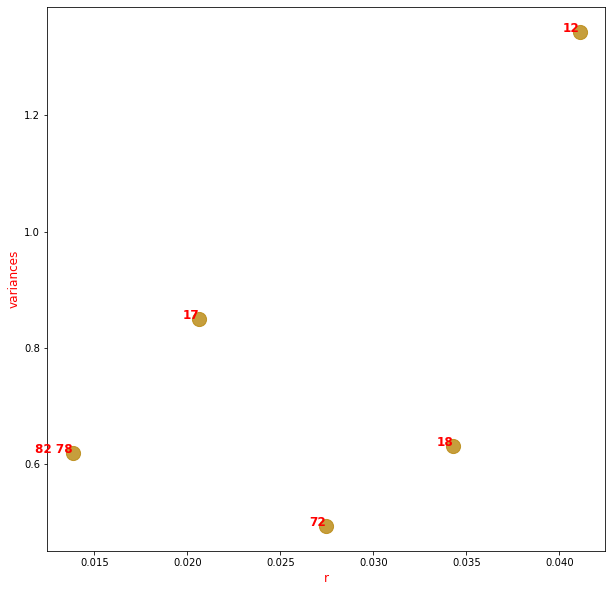

In [223]:
plt.figure(figsize=(10,10))
sns.regplot(data=list_ranges, x="r", y="variances", fit_reg=False, color="darkgoldenrod", scatter_kws={'s':200})
plt.xlabel("r",color="red",fontsize=12)
plt.ylabel("variances",color="red",fontsize=12)
for j in range(len(list_ranges.index)):
     plt.text(list_ranges.loc[j][1], list_ranges.loc[j][7], list_ranges["name of wells"][j], horizontalalignment='right', size='large', color='red', weight='semibold')
plt.show()